# TIME SERIES ANALYSIS - TRAFFIC DATASET

# 1. Data Capture and Initial Analysis
---------------------------------------------------------------------------

In [1]:
#import pandas to read the raw data csv file to a dataframe
import pandas as pd


# Reading the raw dataset 
traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')

# To understand the number of rows and columns in the dataset
traffic.shape


(48204, 9)

In [2]:
# Printing the first 6 rows of the dataset
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# Printing the last 6 rows of the dataset
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
# min, max count avg and percentile details of each column 
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [5]:
# To understand the data types of the column data
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB



# 2. Exploratory Data Analysis and Visualisation
----------------------------------------------------------------------------------

## 2.1 Univariate Analysis 


### Column 1 : Holiday

In [6]:
#from head and tail values of dataset we could only see None values in holiday column 

#printing the unique values in the dataset
traffic['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

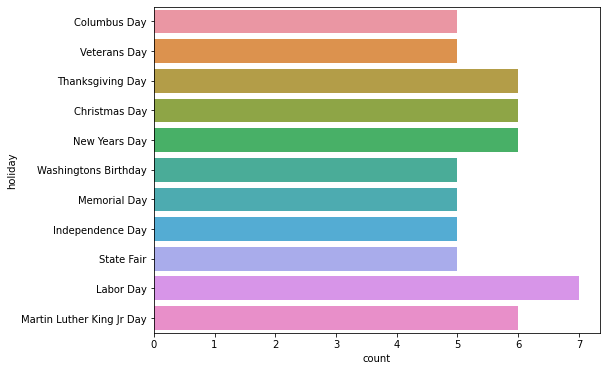

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

#visualising non None values in holiday column 
holidays = traffic.loc[traffic.holiday != 'None']

plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

In [8]:
# shape and count of data with holidays 
holidays.shape

(61, 9)

In [9]:
# shape and count of regular days (holiday not None) 
regular_days = traffic.loc[traffic.holiday == 'None']
regular_days.shape

(48143, 9)

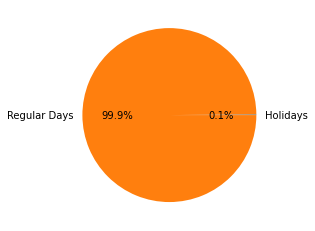

In [10]:
# comparing holidays and regular days percentage

plt.pie([holidays.shape[0] , regular_days.shape[0] ], labels= ['Holidays', 'Regular Days'], autopct='%1.1f%%')
plt.show()

## Column 2 : Temperature

In [11]:
# Analysing temp Column
traffic['temp'].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

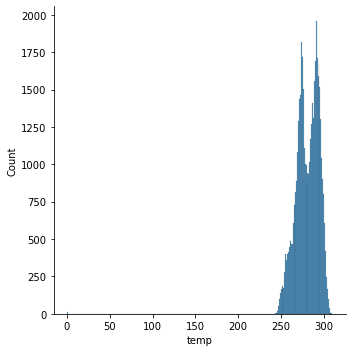

In [12]:
# visualising temp distribution 
sns.displot(traffic, x="temp")

<AxesSubplot:>

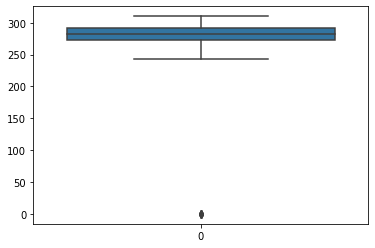

In [13]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=traffic['temp'])

## Column 3 : Rain

In [14]:
#traffic['rain_1h'].value_counts()
traffic['rain_1h'].describe()

count    48204.000000
mean         0.334264
std         44.789133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_1h, dtype: float64

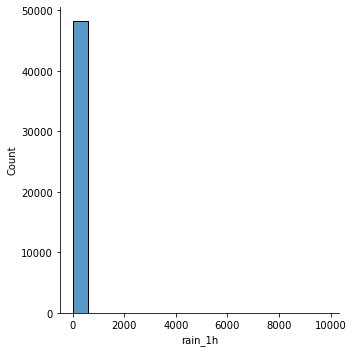

In [15]:
# visualising rain distribution 
sns.displot(traffic, x="rain_1h")

<AxesSubplot:>

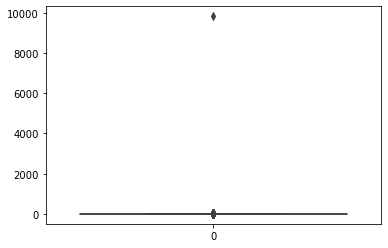

In [16]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=traffic['rain_1h'])

In [17]:
# printing the record with max rainfall recorded ---> 9831.300000

max_rain = traffic[traffic['rain_1h'] == 9831.300000]
max_rain

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,None,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


# Column 4 : Snow

In [18]:
#traffic['snow_1h'].value_counts()
traffic['snow_1h'].describe()

count    48204.000000
mean         0.000222
std          0.008168
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_1h, dtype: float64

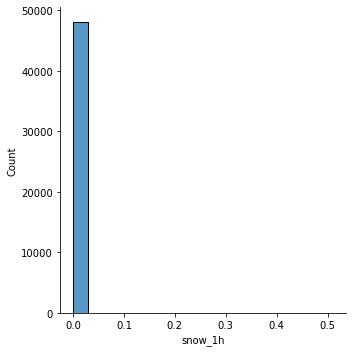

In [19]:
# visualising snow distribution 
sns.displot(traffic, x="snow_1h")

<AxesSubplot:>

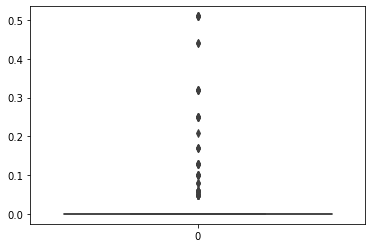

In [20]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=traffic['snow_1h'])

In [21]:
# printing the record with max snowfall. recorded ---> 0.510000

traffic[traffic['snow_1h'] > 0.4]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20158,None,274.33,0.98,0.51,90,Rain,moderate rain,2015-12-23 12:00:00,5167
20159,None,274.33,0.98,0.51,90,Snow,snow,2015-12-23 12:00:00,5167
20160,None,274.33,0.98,0.51,90,Mist,mist,2015-12-23 12:00:00,5167
20161,None,274.33,0.98,0.51,90,Fog,fog,2015-12-23 12:00:00,5167
20268,None,267.14,0.00,0.44,90,Snow,snow,2015-12-28 22:00:00,2165
20269,None,267.14,0.00,0.44,90,Mist,mist,2015-12-28 22:00:00,2165
20270,None,267.06,0.00,0.51,90,Snow,snow,2015-12-28 23:00:00,888
20271,None,267.06,0.00,0.51,90,Mist,mist,2015-12-28 23:00:00,888


## Column 5 : Clouds

In [22]:
#percentage of cloud cover - categorical variable 

traffic['clouds_all'].describe()


count    48204.000000
mean        49.362231
std         39.015750
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


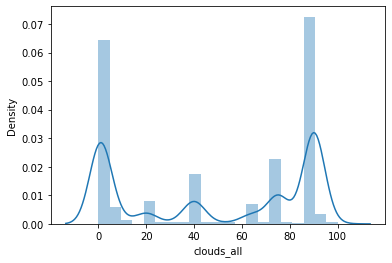

In [23]:
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(traffic['clouds_all'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clouds_all'>

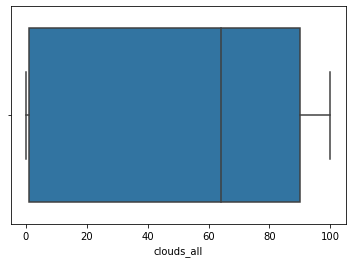

In [24]:
# visualising clouds_all distribution 
sns.boxplot(traffic['clouds_all'])


## Column 6 : Weather 

In [25]:
traffic['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

<AxesSubplot:xlabel='count', ylabel='weather_main'>

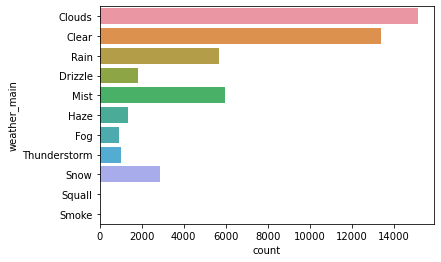

In [26]:
sns.countplot(y='weather_main', data=traffic)

## Column 7 : Weather Description

In [27]:
#traffic['weather_description'].value_counts()

<AxesSubplot:xlabel='count', ylabel='weather_description'>

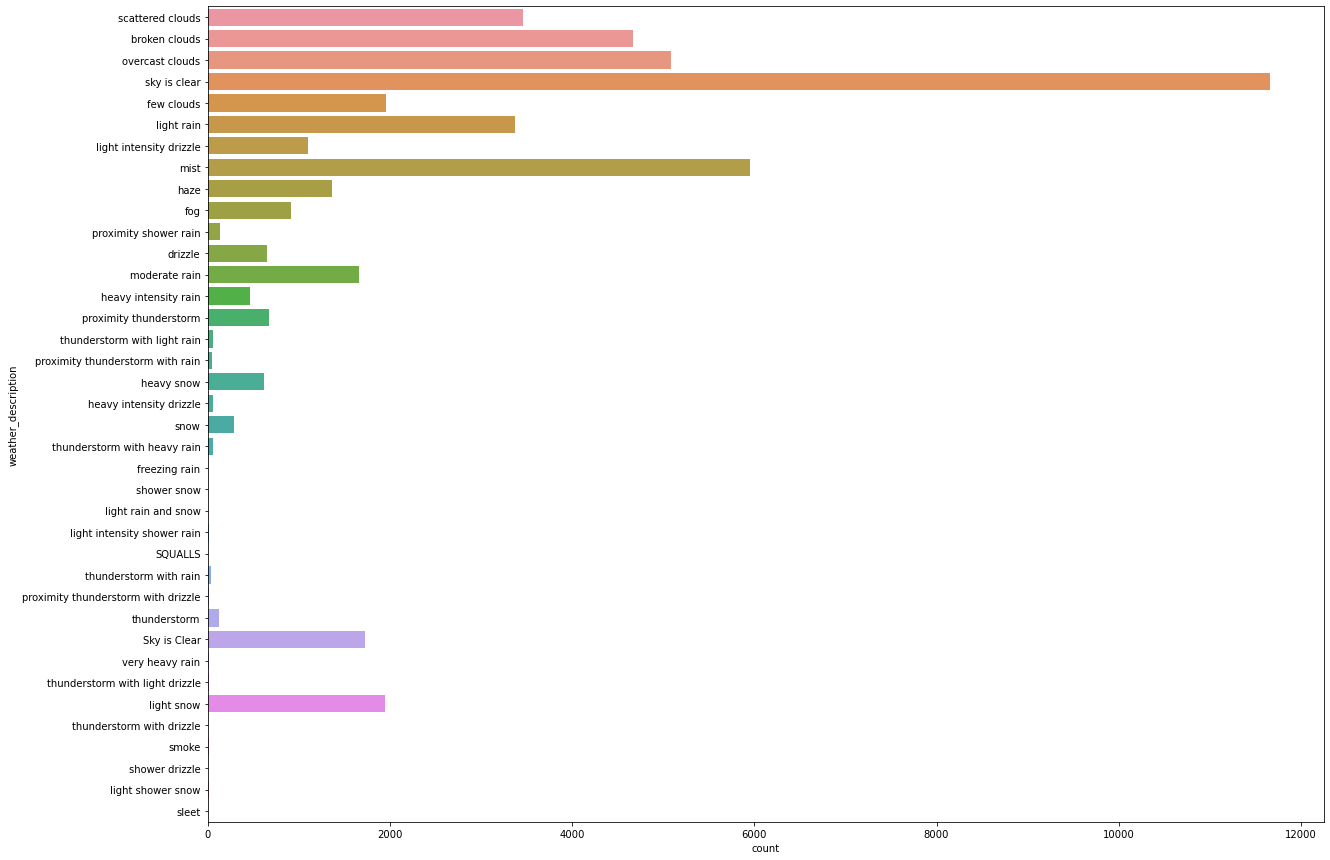

In [28]:
plt.figure(figsize=(20,15))
sns.countplot(y='weather_description', data=traffic)

## Column 8 : Date and Time

In [29]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [30]:
# min date recorded in the dataset
traffic.date_time.min()

'2012-10-02 09:00:00'

In [31]:
#max date recorded in the dataset
traffic.date_time.max()

'2018-09-30 23:00:00'

In [32]:
#plt.plot(traffic['date_time'])
#plt.show()

## Column 9 : Traffic Volume

In [33]:
#traffic['traffic_volume'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


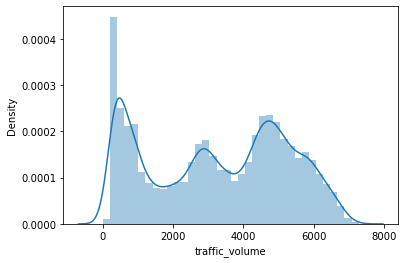

In [34]:
sns.distplot(traffic['traffic_volume'])
plt.show()

In [35]:
#checking for null values 
traffic['traffic_volume'].isnull().sum()

0

### 2.1.1 CONCLUSIONS FROM UNIVARIATE ANALYSIS:

# 2.2 Multivariate Analysis


## 2.2.1 Analysing Columns against Datetime column

<AxesSubplot:xlabel='date_time'>

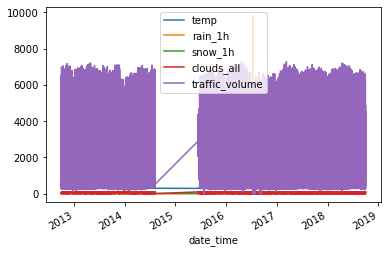

In [36]:
# plot showing date Vs other features in the traffic dataset
traffic.set_index(pd.to_datetime(traffic.date_time), drop=True).plot()

In [37]:
# checking if there is any data present in between 9th aug 2014 and 10th june 2015 ( missing data)

traffic.loc[(traffic['date_time'] >= '2014-08-09') & (traffic['date_time'] <= '2015-06-10')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume


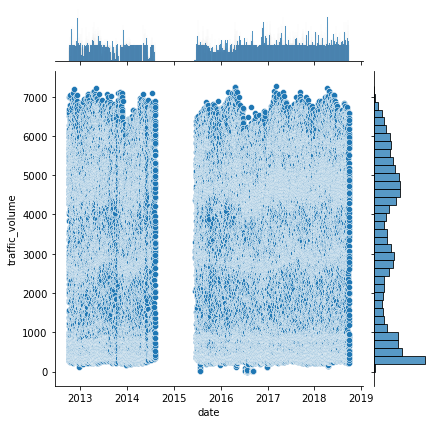

In [38]:
# Plotting 2d join plot between date and traffic volume
traffic['date_time']= pd.to_datetime(traffic['date_time'])
traffic['date']=traffic['date_time'].dt.date


sns.jointplot(data=traffic, x="date", y="traffic_volume")

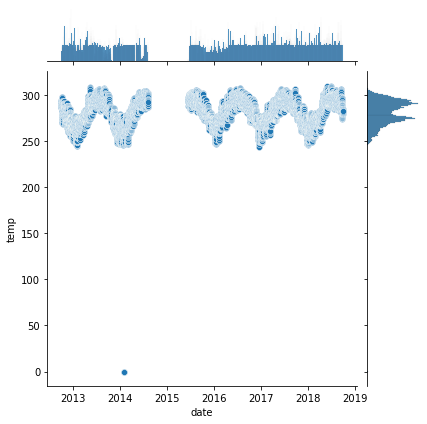

In [39]:
# Plotting 2d join plot between date and temperature
sns.jointplot(data=traffic, x="date", y="temp")

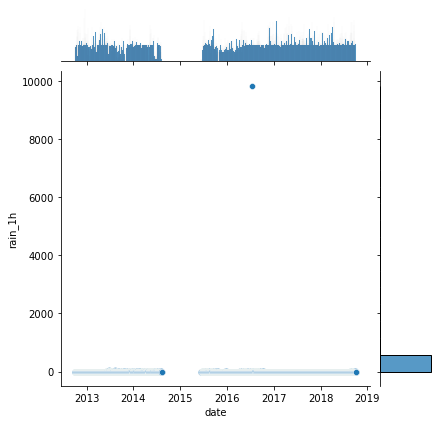

In [40]:
# Plotting 2d join plot between date and rain fall 
sns.jointplot(data=traffic, x="date", y="rain_1h")

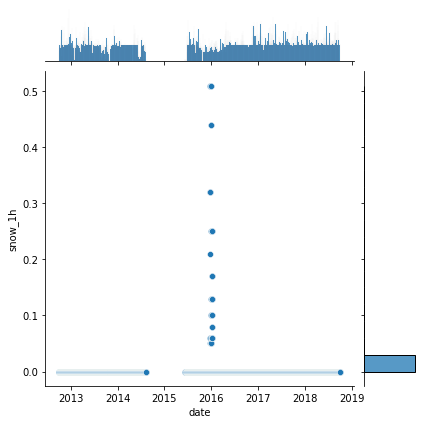

In [41]:
# Plotting 2d join plot between date and snowfall
sns.jointplot(data=traffic, x="date", y="snow_1h")

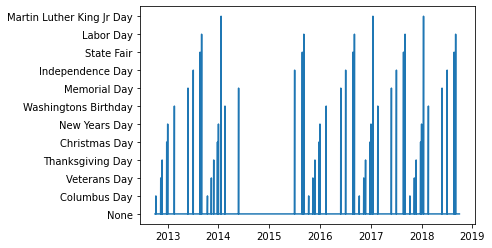

In [42]:
# Plotting relation between date and holidays
plt.plot(traffic['date'],traffic['holiday'])

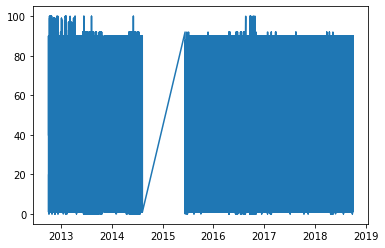

In [43]:
# Plotting relation between date and clouds
plt.plot(traffic['date'],traffic['clouds_all'])

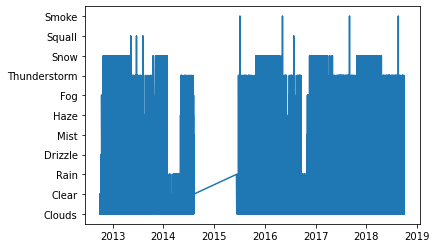

In [44]:
# Plotting relation between date and weather (main description -categorical var)
plt.plot(traffic['date'],traffic['weather_main'])

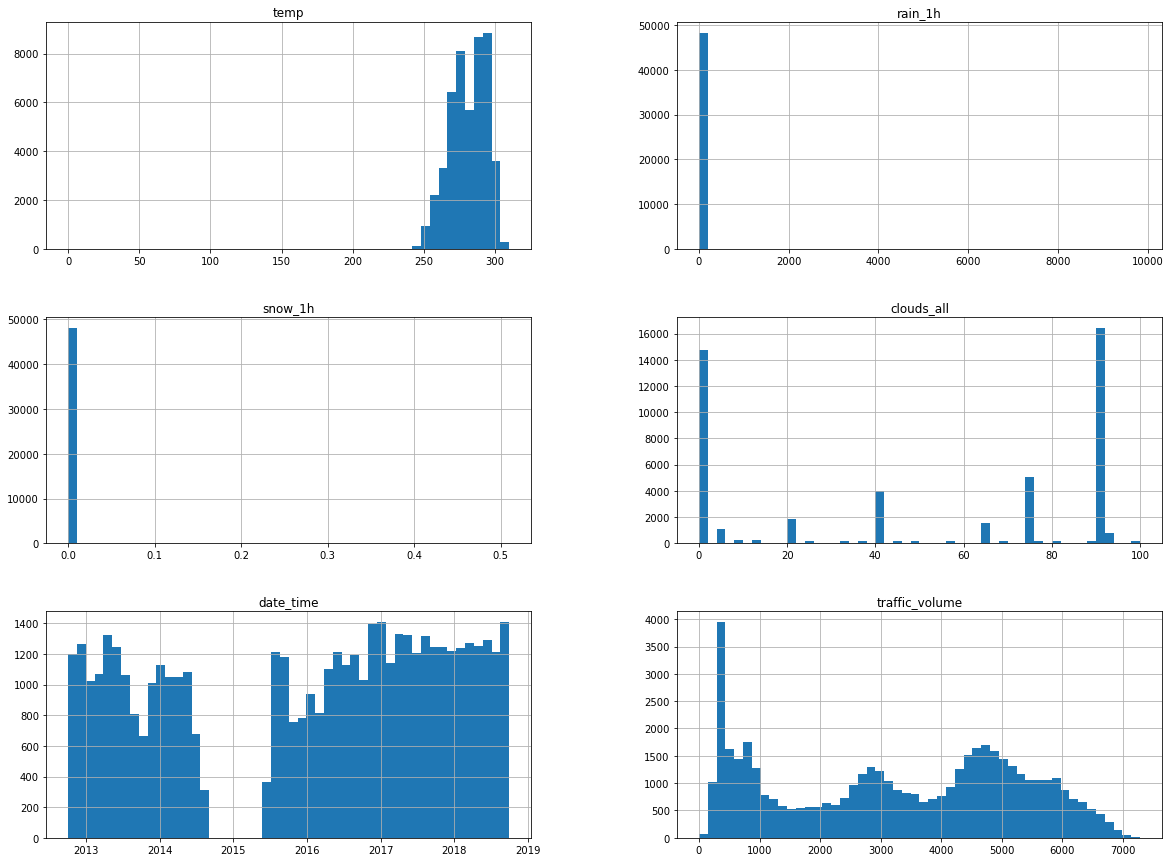

In [45]:
get_ipython().run_line_magic('matplotlib', 'inline')

traffic.hist(bins=50, figsize=(20,15))
plt.show()

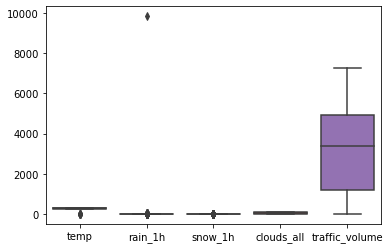

In [46]:
#box plot for all the columns to check outliers 
ax = sns.boxplot(data=traffic)

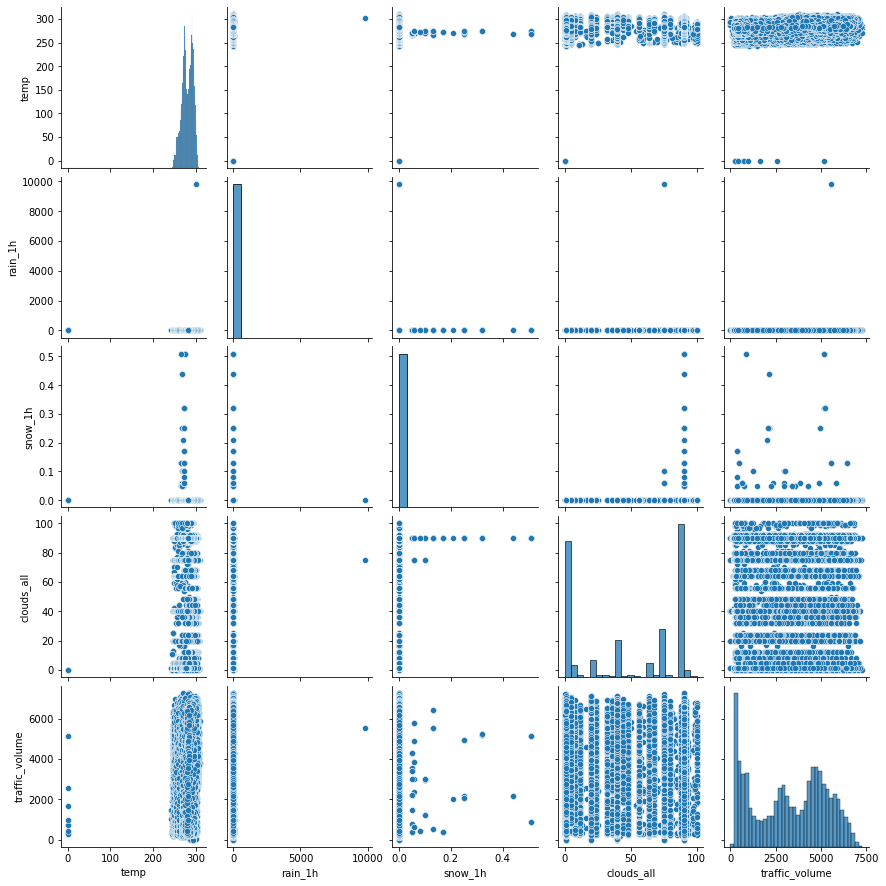

In [47]:
#pit plot to identify the relation between columns if any
sns.pairplot(traffic)

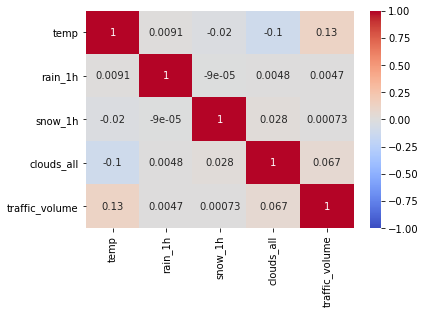

In [48]:
# plotting correlation 

#Using Pearson Correlation
correlation_matrix = traffic.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()



### CONCLUSIONS FROM Multi-VARIATE ANALYSIS:

# 3. Data Pre-Processing
--------------------------------------------------------

In [49]:
#converting date to datetime64[ns] data type. 
traffic['date']= pd.to_datetime(traffic['date'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   date                 48204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 3.7+ MB


###  3.1  Replacing column values

In [50]:
def holiday_info(holiday):
    '''
        this method converts holiday column values, 
        returns 1 if value is None 
        return 0 if it is a holiday( not None)
    '''
    if holiday == 'None':
        return "1"
    else:
        return '0'
    
    
# converting the values of holiday column from categorical to numerical
traffic['holiday'] = traffic['holiday'].apply(holiday_info)
traffic.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
0,1,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02
1,1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02
2,1,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02
3,1,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02
4,1,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02
5,1,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,2012-10-02
6,1,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,2012-10-02
7,1,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,2012-10-02
8,1,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,2012-10-02
9,1,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,2012-10-02


### 3.2 Coverting temp values to celsuis

In [51]:
# converting Average temperature from Kelvin to Celsius

traffic['temp']= traffic['temp']-273.15
traffic['temp'].describe()

count    48204.000000
mean         8.055870
std         13.338232
min       -273.150000
25%         -0.990000
50%          9.300000
75%         18.656000
max         36.920000
Name: temp, dtype: float64

### 3.3 Handling / Removing outliers

In [52]:
# removing the outliers, temp less than -50,
traffic = traffic[traffic['temp']>-50]
traffic['temp'].describe()

count    48194.000000
mean         8.114219
std         12.709587
min        -29.760000
25%         -0.967500
50%          9.310000
75%         18.660000
max         36.920000
Name: temp, dtype: float64

In [53]:
# removing the outliers, rain per hour greater than 2000mm per hr,

traffic = traffic[traffic['rain_1h']<2000]
traffic['rain_1h'].describe()

count    48193.000000
mean         0.130342
std          1.003480
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.630000
Name: rain_1h, dtype: float64

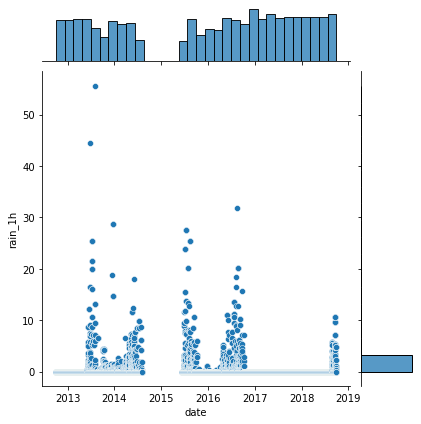

In [54]:
# 2d plot showing relation between date and rain 

traffic = traffic[traffic['rain_1h']<2000]
sns.jointplot(data=traffic, x="date", y="rain_1h")

In [55]:
traffic = traffic[traffic['snow_1h']<0.05]
traffic['snow_1h'].describe()

count    48130.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: snow_1h, dtype: float64

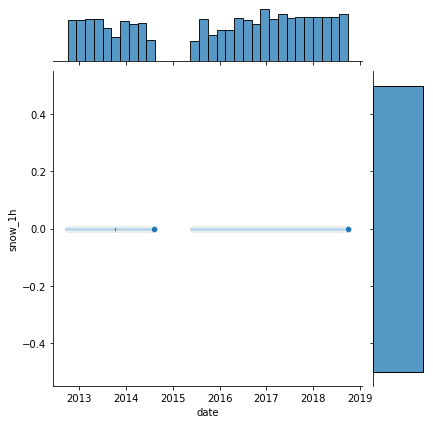

In [56]:
# https://www.wunderground.com/history/monthly/us/mn/minneapolis/KMSP/date/2016-2 
# ---> max 0.03 ( Hence, no data processing done)

sns.jointplot(data=traffic, x="date", y="snow_1h")

### 3.4 Handling missing values from sep 2014 to may 2015

processed data before performing timeseries analysis.

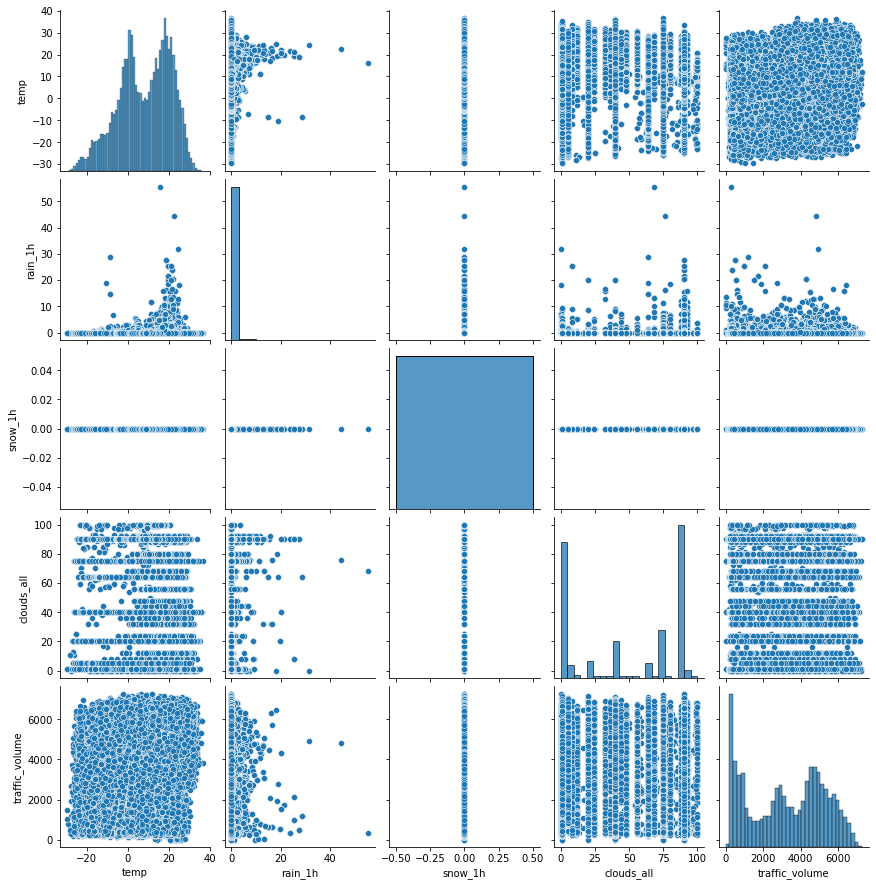

In [57]:
sns.pairplot(traffic)

# 4 Research Questions
-----------------------------------------------

## 4.1 What is being Analysed?

## 4.2 Why is it being Analysed?

## 4.3 What is the future score of this research?

## 4.4 How is it being analysed?

### 4.4.1 Suitable Algorithms - Regrerssion Analysis

### 4.4.1 Suitable Algorithms - TimeSeries Analysis

## 4.5 Identifying targets and variables for regression analysis:

## 5. Preparing Data for Regression Analysis
---------------------------------------------------------------------------

### 5.1 Remove unused columns before encoding

In [58]:
#print all the column names 
traffic.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'date'],
      dtype='object')

In [59]:
# check the data type of the columns
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48130 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48130 non-null  object        
 1   temp                 48130 non-null  float64       
 2   rain_1h              48130 non-null  float64       
 3   snow_1h              48130 non-null  float64       
 4   clouds_all           48130 non-null  int64         
 5   weather_main         48130 non-null  object        
 6   weather_description  48130 non-null  object        
 7   date_time            48130 non-null  datetime64[ns]
 8   traffic_volume       48130 non-null  int64         
 9   date                 48130 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 4.0+ MB


In [60]:
# visualising top 6 rows od the dataframe 
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date
0,1,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02
1,1,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02
2,1,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02
3,1,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02
4,1,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02


In [61]:
# saving a copy of traffic data to perform timeseries analysis 
traffic_ts = traffic

In [62]:
# Split date and time fields for deeper analysis

traffic['year'] = traffic['date_time'].dt.year
traffic['month'] = traffic['date_time'].dt.month
traffic['day'] = traffic['date_time'].dt.day
traffic['weekday'] = traffic['date_time'].dt.day_name()
traffic['date_time'] = traffic['date_time'].dt.hour
traffic = traffic.rename(columns={"date_time": "time"})

traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48130 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48130 non-null  object        
 1   temp                 48130 non-null  float64       
 2   rain_1h              48130 non-null  float64       
 3   snow_1h              48130 non-null  float64       
 4   clouds_all           48130 non-null  int64         
 5   weather_main         48130 non-null  object        
 6   weather_description  48130 non-null  object        
 7   time                 48130 non-null  int64         
 8   traffic_volume       48130 non-null  int64         
 9   date                 48130 non-null  datetime64[ns]
 10  year                 48130 non-null  int64         
 11  month                48130 non-null  int64         
 12  day                  48130 non-null  int64         
 13  weekday              48130 non-

In [63]:
# visualising top 6 rows od the dataframe 
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,time,traffic_volume,date,year,month,day,weekday
0,1,15.13,0.0,0.0,40,Clouds,scattered clouds,9,5545,2012-10-02,2012,10,2,Tuesday
1,1,16.21,0.0,0.0,75,Clouds,broken clouds,10,4516,2012-10-02,2012,10,2,Tuesday
2,1,16.43,0.0,0.0,90,Clouds,overcast clouds,11,4767,2012-10-02,2012,10,2,Tuesday
3,1,16.98,0.0,0.0,90,Clouds,overcast clouds,12,5026,2012-10-02,2012,10,2,Tuesday
4,1,17.99,0.0,0.0,75,Clouds,broken clouds,13,4918,2012-10-02,2012,10,2,Tuesday


In [64]:
# removing unused cols from taffic data frame,

cols = ['weather_main','weather_description','date']
traffic.drop(cols, axis=1, inplace=True)
traffic.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,time,traffic_volume,year,month,day,weekday
0,1,15.13,0.0,0.0,40,9,5545,2012,10,2,Tuesday
1,1,16.21,0.0,0.0,75,10,4516,2012,10,2,Tuesday
2,1,16.43,0.0,0.0,90,11,4767,2012,10,2,Tuesday
3,1,16.98,0.0,0.0,90,12,5026,2012,10,2,Tuesday
4,1,17.99,0.0,0.0,75,13,4918,2012,10,2,Tuesday


In [65]:
def weekday_info(weekday):
    '''
    This method converts categorical days to numeric values, 
    encoding the weekdays with whole numbers
    '''
    if weekday == 'Monday':
        return "1"
    elif weekday == 'Tuesday':
        return "2"
    elif weekday == 'Wednesday':
        return "3"
    elif weekday == 'Thursday':
        return "4"
    elif weekday == 'Friday':
        return "5"
    elif weekday == 'Saturday':
        return "6"
    else:
        return '0'

traffic['weekday'] = traffic['weekday'].apply(weekday_info)
traffic.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,time,traffic_volume,year,month,day,weekday
0,1,15.13,0.0,0.0,40,9,5545,2012,10,2,2
1,1,16.21,0.0,0.0,75,10,4516,2012,10,2,2
2,1,16.43,0.0,0.0,90,11,4767,2012,10,2,2
3,1,16.98,0.0,0.0,90,12,5026,2012,10,2,2
4,1,17.99,0.0,0.0,75,13,4918,2012,10,2,2
5,1,18.57,0.0,0.0,1,14,5181,2012,10,2,2
6,1,20.02,0.0,0.0,1,15,5584,2012,10,2,2
7,1,20.71,0.0,0.0,1,16,6015,2012,10,2,2
8,1,20.99,0.0,0.0,20,17,5791,2012,10,2,2
9,1,19.95,0.0,0.0,20,18,4770,2012,10,2,2


## 5.2 Encoding data 

In [66]:
#https://scikit-learn.org/stable/modules/preprocessing.html
#encoding-features

from sklearn.preprocessing import LabelEncoder

#Assigning the traffic dataset to a new variable process_data
process_data = traffic
process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48130 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48130 non-null  object 
 1   temp            48130 non-null  float64
 2   rain_1h         48130 non-null  float64
 3   snow_1h         48130 non-null  float64
 4   clouds_all      48130 non-null  int64  
 5   time            48130 non-null  int64  
 6   traffic_volume  48130 non-null  int64  
 7   year            48130 non-null  int64  
 8   month           48130 non-null  int64  
 9   day             48130 non-null  int64  
 10  weekday         48130 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 4.4+ MB


In [67]:
#scaling the data in dataset to normalise
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
process_data = pd.DataFrame(scaler.fit_transform(process_data), columns=process_data.columns)
process_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,time,traffic_volume,year,month,day,weekday
0,0.035623,0.550906,-0.1299,0.0,-0.238914,-0.345808,1.149803,-1.854341,1.029048,-1.575065,-0.493685
1,0.035623,0.635865,-0.1299,0.0,0.658234,-0.201715,0.631880,-1.854341,1.029048,-1.575065,-0.493685
2,0.035623,0.653172,-0.1299,0.0,1.042725,-0.057622,0.758215,-1.854341,1.029048,-1.575065,-0.493685
3,0.035623,0.696438,-0.1299,0.0,1.042725,0.086471,0.888576,-1.854341,1.029048,-1.575065,-0.493685
4,0.035623,0.775890,-0.1299,0.0,0.658234,0.230564,0.834217,-1.854341,1.029048,-1.575065,-0.493685


In [68]:
#Scaling the data because of huge diff between the scales of traffic volume and other features 

target = pd.DataFrame(process_data['traffic_volume'])
labels = pd.DataFrame(process_data.drop('traffic_volume', axis=1 ))

display(labels.head(),target.head())

,holiday,temp,rain_1h,snow_1h,clouds_all,time,year,month,day,weekday
0,0.035623,0.550906,-0.1299,0.0,-0.238914,-0.345808,-1.854341,1.029048,-1.575065,-0.493685
1,0.035623,0.635865,-0.1299,0.0,0.658234,-0.201715,-1.854341,1.029048,-1.575065,-0.493685
2,0.035623,0.653172,-0.1299,0.0,1.042725,-0.057622,-1.854341,1.029048,-1.575065,-0.493685
3,0.035623,0.696438,-0.1299,0.0,1.042725,0.086471,-1.854341,1.029048,-1.575065,-0.493685
4,0.035623,0.775890,-0.1299,0.0,0.658234,0.230564,-1.854341,1.029048,-1.575065,-0.493685


,traffic_volume
0,1.149803
1,0.631880
2,0.758215
3,0.888576
4,0.834217


In [69]:
# creating a dummy variable 
dummy_var = pd.get_dummies(labels)
dummy_var

,holiday,temp,rain_1h,snow_1h,clouds_all,time,year,month,day,weekday
0,0.035623,0.550906,-0.1299,0.0,-0.238914,-0.345808,-1.854341,1.029048,-1.575065,-0.493685
1,0.035623,0.635865,-0.1299,0.0,0.658234,-0.201715,-1.854341,1.029048,-1.575065,-0.493685
2,0.035623,0.653172,-0.1299,0.0,1.042725,-0.057622,-1.854341,1.029048,-1.575065,-0.493685
3,0.035623,0.696438,-0.1299,0.0,1.042725,0.086471,-1.854341,1.029048,-1.575065,-0.493685
4,0.035623,0.775890,-0.1299,0.0,0.658234,0.230564,-1.854341,1.029048,-1.575065,-0.493685
...,...,...,...,...,...,...,...,...,...,...
48125,0.035623,0.170950,-0.1299,0.0,0.658234,1.095121,1.312835,0.734604,1.636355,-1.493981
48126,0.035623,0.116671,-0.1299,0.0,1.042725,1.239214,1.312835,0.734604,1.636355,-1.493981
48127,0.035623,0.114311,-0.1299,0.0,1.042725,1.383307,1.312835,0.734604,1.636355,-1.493981
48128,0.035623,0.063965,-0.1299,0.0,1.042725,1.527400,1.312835,0.734604,1.636355,-1.493981


In [70]:
# printing the dummy varible and target to check columns and values 
display(dummy_var,target)

,holiday,temp,rain_1h,snow_1h,clouds_all,time,year,month,day,weekday
0,0.035623,0.550906,-0.1299,0.0,-0.238914,-0.345808,-1.854341,1.029048,-1.575065,-0.493685
1,0.035623,0.635865,-0.1299,0.0,0.658234,-0.201715,-1.854341,1.029048,-1.575065,-0.493685
2,0.035623,0.653172,-0.1299,0.0,1.042725,-0.057622,-1.854341,1.029048,-1.575065,-0.493685
3,0.035623,0.696438,-0.1299,0.0,1.042725,0.086471,-1.854341,1.029048,-1.575065,-0.493685
4,0.035623,0.775890,-0.1299,0.0,0.658234,0.230564,-1.854341,1.029048,-1.575065,-0.493685
...,...,...,...,...,...,...,...,...,...,...
48125,0.035623,0.170950,-0.1299,0.0,0.658234,1.095121,1.312835,0.734604,1.636355,-1.493981
48126,0.035623,0.116671,-0.1299,0.0,1.042725,1.239214,1.312835,0.734604,1.636355,-1.493981
48127,0.035623,0.114311,-0.1299,0.0,1.042725,1.383307,1.312835,0.734604,1.636355,-1.493981
48128,0.035623,0.063965,-0.1299,0.0,1.042725,1.527400,1.312835,0.734604,1.636355,-1.493981


,traffic_volume
0,1.149803
1,0.631880
2,0.758215
3,0.888576
4,0.834217
...,...
48125,0.142142
48126,-0.241393
48127,-0.554463
48128,-0.911322


## 5.3 PCA - Principal Component Analysis

In [71]:
# performing PCA on the dataset - simplifying the data dimentionality but retians the trend and patterns

from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(labels)

data = pca.transform(labels)
data

array([[ 0.76573838,  1.2332557 ,  1.51784676, ..., -0.27880068,
        -0.01958131, -0.72222294],
       [ 0.68538635,  1.69642723,  1.05362399, ..., -0.00501607,
        -0.55061942, -0.89147026],
       [ 0.65770294,  1.90241243,  0.81072108, ...,  0.1508093 ,
        -0.7471998 , -0.93330841],
       ...,
       [ 0.75461208,  0.17090115, -1.88824464, ...,  0.00350363,
        -0.47247842,  1.09903273],
       [ 0.7542293 ,  0.18725866, -1.963929  , ...,  0.07007003,
        -0.41605981,  1.1635137 ],
       [ 0.79186769,  0.19345071, -2.04344218, ...,  0.13909687,
        -0.36635893,  1.19445648]])

In [72]:
# view shape of thefeatures and labels
display(data.shape,labels.shape)

(48130, 9)

(48130, 10)

In [73]:
from sklearn import model_selection

#split data as training and testing set 80% and 20% respectively
from sklearn.model_selection import train_test_split

ft_train, ft_test, lb_train, lb_test = train_test_split(data , target, test_size=0.20, random_state = 2)
display(ft_train.shape,ft_test.shape)

(38504, 9)

(9626, 9)

# 6. Applying Machine Learning Algorithms

## 6.1 Multiple Linear Regression

### 6.1.1 MLR with SKlearn 

In [74]:
from sklearn import linear_model


X = ft_train
Y = lb_train
x = ft_test
y = lb_test


# with sklearn getting multiple linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:', regr.intercept_)
print('\nCoefficients:', regr.coef_)

# prediction with sklearn
lb_pred = regr.predict(x)
print ('\n Predicted : ', lb_pred)

Intercept: [0.00020779]

Coefficients: [[ 0.12715696  0.01077529 -0.21910045 -0.162012    0.01603411 -0.049276
   0.19926986  0.04652172 -0.03373597]]

 Predicted :  [[-0.45419339]
 [-0.31817921]
 [-0.2632542 ]
 ...
 [-0.29902849]
 [-0.06245372]
 [-0.25634784]]


In [75]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Multiple Linear Regression')
print('------------------------------')

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Multiple Linear Regression
------------------------------
MAE : 0.82
MSE : 0.86
RMSE  : 0.925102
R2_SCORE  : 0.146603


### 6.1.2 MLR with stats Model

In [76]:
# with statsmodels
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         traffic_volume   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     718.1
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:56:50   Log-Likelihood:                -51633.
No. Observations:               38504   AIC:                         1.033e+05
Df Residuals:                   38494   BIC:                         1.034e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.005      0.044      0.9

## 6.2 Support Vector Regressor

In [77]:
import numpy as np
np.random.seed(seed=5)

import warnings
warnings.simplefilter("ignore", UserWarning)

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


# Train the model using the training sets for c=10 and e=0.4
regr = SVR(C=10, epsilon=0.4)
regr.fit(ft_train, lb_train)

# Make predictions using the testing set
lb_pred = regr.predict(ft_test)

In [78]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Support Vector Regressor')
print('------------------------------')

print('Accuracy : {}'.format(regr.score(ft_test, lb_test)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Support Vector Regressor
------------------------------
Accuracy : 0.7883733013567891
MAE : 0.35
MSE : 0.21
RMSE  : 0.460680
R2_SCORE  : 0.788373


## 6.3 KNN Regressor

In [79]:
from sklearn.neighbors import KNeighborsRegressor

# checking the accuracy while looping throught the neighbors count from 1 to 9
for n in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(ft_train, lb_train)
    lb_pred = knn.predict(ft_test)
    print('KNeighborsRegressor: n = {} , Accuracy is: {}'.format(n,knn.score(ft_test, lb_test)))

KNeighborsRegressor: n = 1 , Accuracy is: 0.7916049845276343
KNeighborsRegressor: n = 2 , Accuracy is: 0.8241106578987706
KNeighborsRegressor: n = 3 , Accuracy is: 0.8159313128278626
KNeighborsRegressor: n = 4 , Accuracy is: 0.8119873797309655
KNeighborsRegressor: n = 5 , Accuracy is: 0.8090679203892419
KNeighborsRegressor: n = 6 , Accuracy is: 0.8085563529726397
KNeighborsRegressor: n = 7 , Accuracy is: 0.8096194946240436
KNeighborsRegressor: n = 8 , Accuracy is: 0.8070245284166122
KNeighborsRegressor: n = 9 , Accuracy is: 0.8029249466155639


In [80]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('KNeighborsRegressor')
print('------------------------------')
# initialising the regressor for n=2 
knn = KNeighborsRegressor(n_neighbors = 2)

# applying the model for the test values
knn.fit(ft_train, lb_train)

# predicting the out put values for test inputs 
lb_pred = knn.predict(ft_test)

print('Accuracy : {}'.format(knn.score(ft_test, lb_test)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

KNeighborsRegressor
------------------------------
Accuracy : 0.8241106578987706
MAE : 0.32
MSE : 0.2
RMSE  : 0.444560
R2_SCORE  : 0.802925


## 6.4 MLP Regressor ( Multi Layer Perceptron Model)

In [81]:
import numpy as np
s=5;
np.random.seed(seed=s)

from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# creating mlp regressor model from sklearn
model = MLPRegressor()

#Training the model with test data
model.fit(ft_train, lb_train)
 
#predicting the output for test inputs
lb_pred = model.predict(ft_test)

In [82]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Multi Layer Perceptron Model')
print('------------------------------')

print('Accuracy : {}'.format(metrics.r2_score(test, pred)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Multi Layer Perceptron Model
------------------------------
Accuracy : 0.940257108012639
MAE : 0.17
MSE : 0.06
RMSE  : 0.244770
R2_SCORE  : 0.940257


# 7. Time-Series Analysis

## 7.1 Data preparation

In [83]:
# fetching the originally pre processed data before performing regression analysis. 
traffic_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48130 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48130 non-null  object        
 1   temp                 48130 non-null  float64       
 2   rain_1h              48130 non-null  float64       
 3   snow_1h              48130 non-null  float64       
 4   clouds_all           48130 non-null  int64         
 5   weather_main         48130 non-null  object        
 6   weather_description  48130 non-null  object        
 7   date_time            48130 non-null  int64         
 8   traffic_volume       48130 non-null  int64         
 9   date                 48130 non-null  datetime64[ns]
 10  year                 48130 non-null  int64         
 11  month                48130 non-null  int64         
 12  day                  48130 non-null  int64         
 13  weekday              48130 non-

In [84]:
traffic_ts.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,year,month,day,weekday
0,1,15.13,0.0,0.0,40,Clouds,scattered clouds,9,5545,2012-10-02,2012,10,2,Tuesday
1,1,16.21,0.0,0.0,75,Clouds,broken clouds,10,4516,2012-10-02,2012,10,2,Tuesday
2,1,16.43,0.0,0.0,90,Clouds,overcast clouds,11,4767,2012-10-02,2012,10,2,Tuesday
3,1,16.98,0.0,0.0,90,Clouds,overcast clouds,12,5026,2012-10-02,2012,10,2,Tuesday
4,1,17.99,0.0,0.0,75,Clouds,broken clouds,13,4918,2012-10-02,2012,10,2,Tuesday


In [85]:
# getting list of columns from traffic_ts 
traffic_ts.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'date', 'year',
       'month', 'day', 'weekday'],
      dtype='object')

In [86]:
# performing univariate time series analysis so keep date_time , traffic_volume column and remove other data
cols = ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description','date_time','year','month','day','weekday']
traffic_ts.drop(cols, axis=1, inplace=True)

In [87]:
traffic_ts.head()

,traffic_volume,date
0,5545,2012-10-02
1,4516,2012-10-02
2,4767,2012-10-02
3,5026,2012-10-02
4,4918,2012-10-02


In [88]:
# data is recorded per hour, so we group data by data 
traffic_ts = traffic_ts.groupby('date')['traffic_volume'].mean().reset_index()
traffic_ts.head()

,date,traffic_volume
0,2012-10-02,4219.266667
1,2012-10-03,3317.250000
2,2012-10-04,3747.458333
3,2012-10-05,4242.545455
4,2012-10-06,3256.956522


In [89]:
traffic_ts['traffic_volume'] = traffic_ts['traffic_volume'].astype(int)

In [90]:
# setting date as index to create univariate dataset
timeSeries= traffic_ts.set_index(['date'])
timeSeries.index

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-06', '2012-10-07', '2012-10-08', '2012-10-09',
               '2012-10-10', '2012-10-11',
               ...
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
              dtype='datetime64[ns]', name='date', length=1860, freq=None)

In [91]:
timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 2012-10-02 to 2018-09-30
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   traffic_volume  1860 non-null   int32
dtypes: int32(1)
memory usage: 21.8 KB


In [92]:
# creating a timeseries object by resampling by monthly average. 

# getting values of monthly by calculating average
timeSeries = timeSeries['traffic_volume'].resample('MS').mean()

timeSeries.head()


date
2012-10-01    3473.500000
2012-11-01    3241.966667
2012-12-01    3002.838710
2013-01-01    3023.064516
2013-02-01    3173.964286
Freq: MS, Name: traffic_volume, dtype: float64

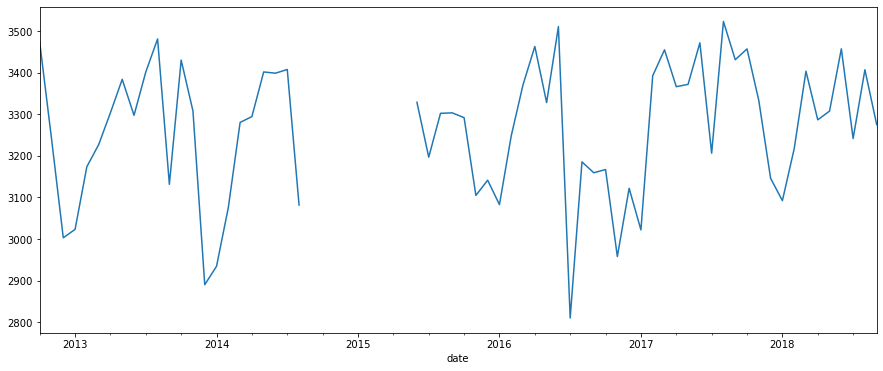

In [93]:
#plotting the timeseries object
timeSeries.plot(figsize=(15, 6))
plt.show()

<AxesSubplot:xlabel='date'>

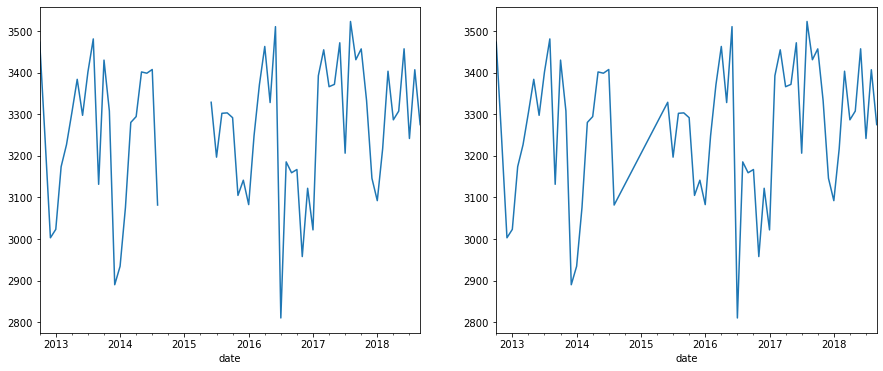

In [94]:
# analysing the time series by filling the missing values by mean usin ffill and interpolate methods

#timeSeries_filled= timeSeries.ffill()
#timeSeries_filled= timeSeries.interpolate(limit=2, limit_direction="forward");


timeSeries_filled = timeSeries.interpolate();

fig, axs = plt.subplots(1,2, figsize=(15, 6))

timeSeries.plot(ax=axs[0])
timeSeries_filled.plot(ax=axs[1])

### 7.1.2 Moving Average Analysis

In [95]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculate average of last n observations
def moving_average(series, n):
    return np.average(series[-n:])

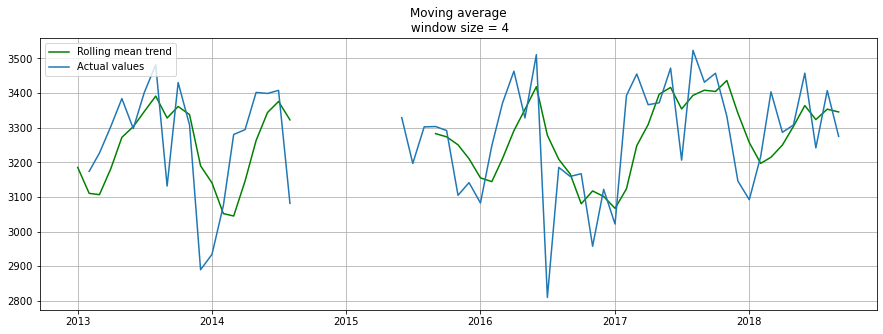

In [96]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(series[series.name])
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    

# Plotting the timeseries plot for missing and filled data
plotMovingAverage(timeSeries, 4)

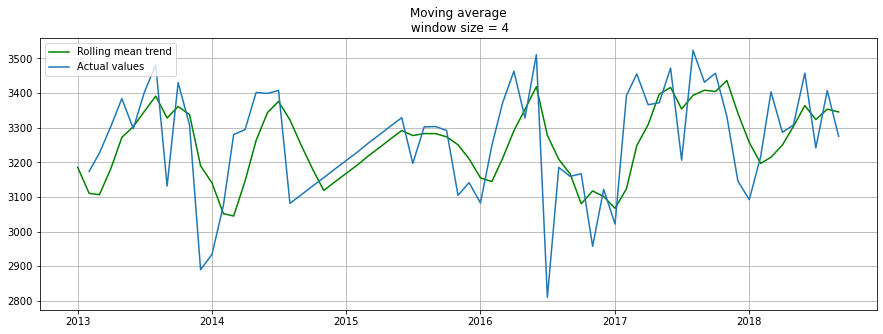

In [97]:
# Plotting the timeseries plot for missing and filled data
plotMovingAverage(timeSeries_filled, 4)

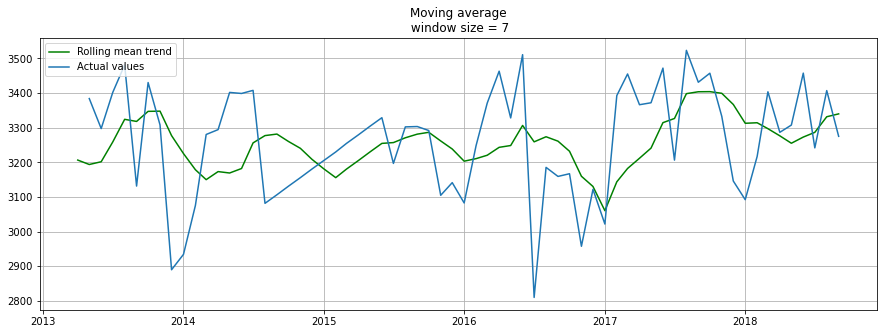

In [98]:
plotMovingAverage(timeSeries_filled, 7) # weekly smoothing

### 7.1.3 Weighted Average Analysis

In [99]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [100]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [101]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

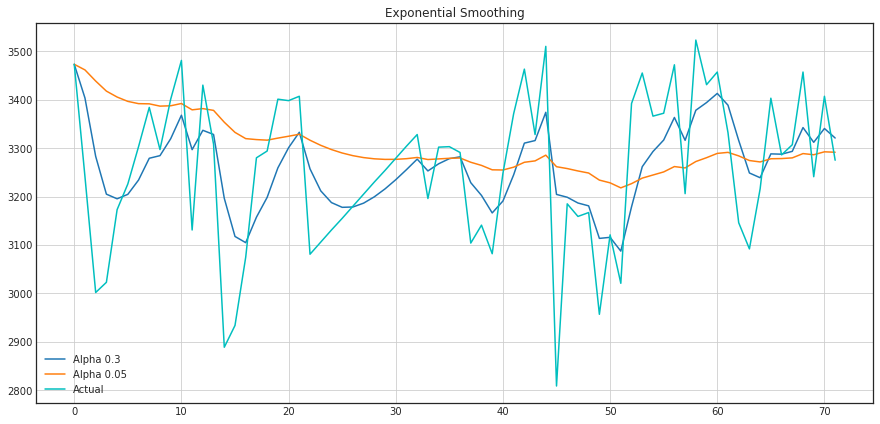

In [102]:
plotExponentialSmoothing(timeSeries_filled.astype(int), [0.3, 0.05])

### 7.1.4 Eponential Smooting

In [103]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

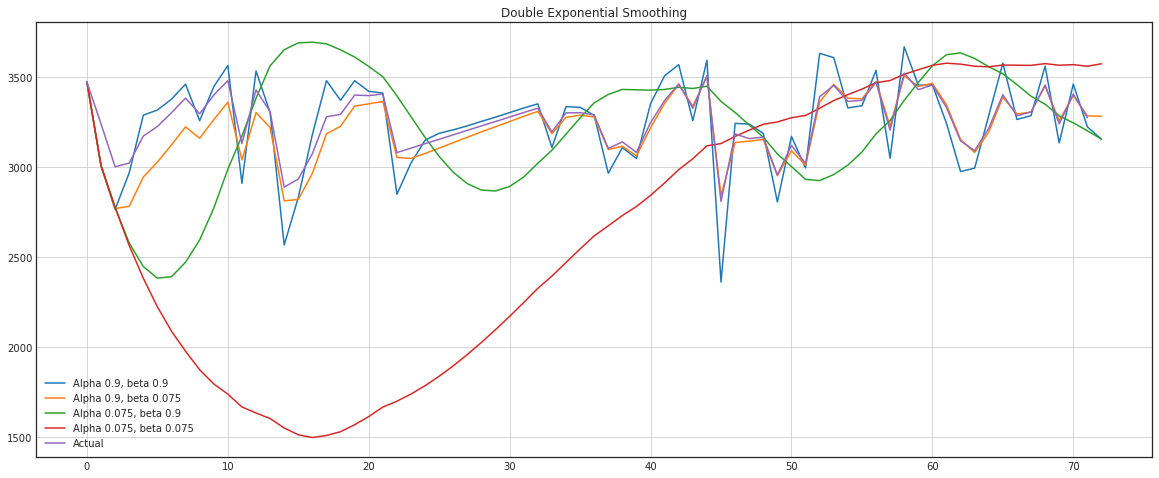

In [104]:
plotDoubleExponentialSmoothing(timeSeries_filled.astype(int), alphas=[0.9, 0.075], betas=[0.9, 0.075])

### 7.1.5 Time Series - Decomposition

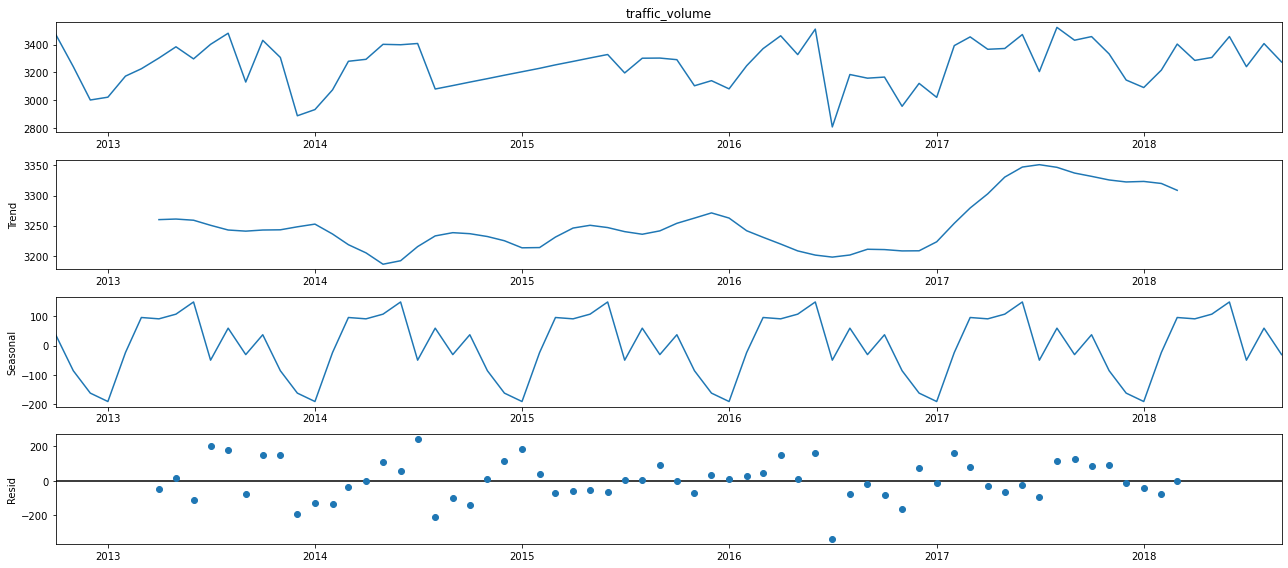

In [105]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(timeSeries_filled, model='additive')

fig = decomposition.plot()
plt.show()

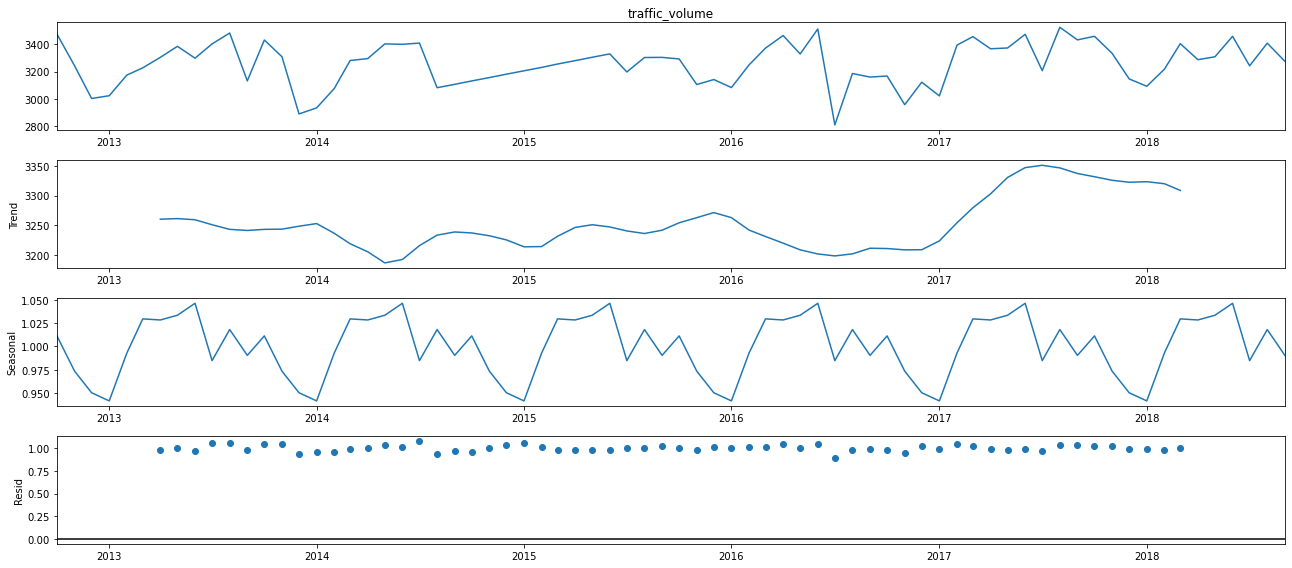

In [106]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(timeSeries_filled, model='multiplicative')


fig = decomposition.plot()
plt.show()

### 7.1.6 Stats Model 

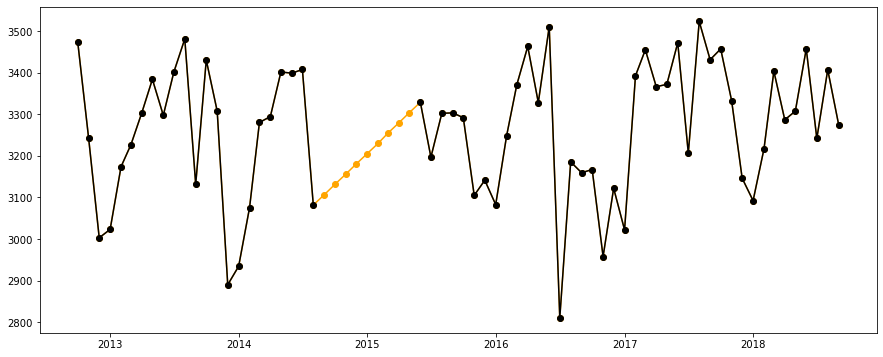

In [107]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

fit1 = SimpleExpSmoothing(timeSeries, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(timeSeries_filled, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')

plt.figure(figsize=(15, 6))

plt.plot(timeSeries_filled, marker='o', color='orange')
plt.plot(timeSeries, marker='o', color='black')

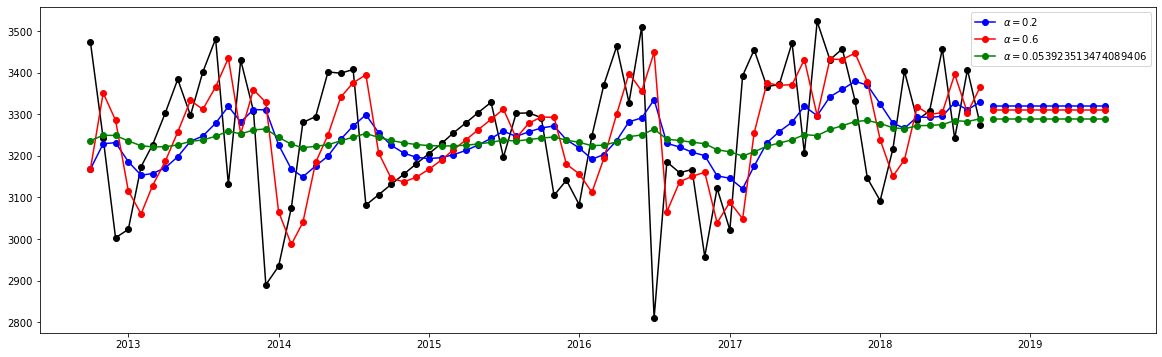

In [108]:
fit1 = SimpleExpSmoothing(timeSeries_filled, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(timeSeries_filled, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(timeSeries_filled, initialization_method="estimated").fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(20, 6))
plt.plot(timeSeries_filled, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

## 7.2  Unsupervised

###  7.2.1 Holt-Winters Forecast 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Unsupervised - without missing values 
Holt-Winters
----------------
MAE : 115.67
MSE : 21468.11
RMSE  : 146.520002
R2_SCORE  : -0.249372


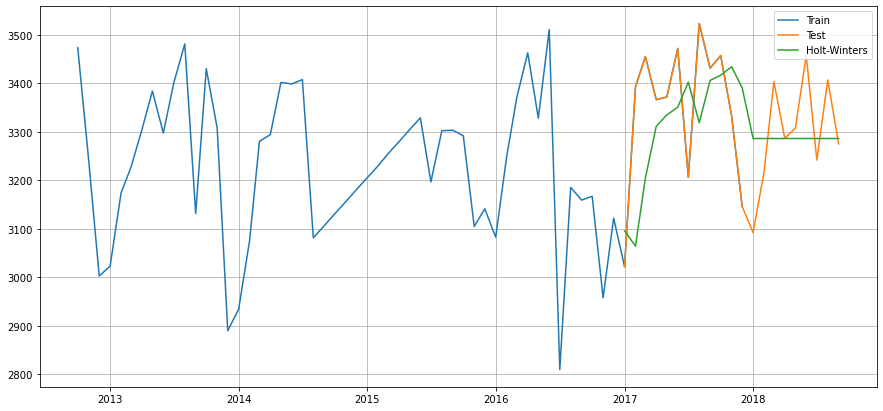

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = timeSeries_filled[:'2017'], timeSeries_filled['2017':]
model = ExponentialSmoothing(train, seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc="upper right")
plt.grid(True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Unsupervised - without missing values ")
print('Holt-Winters')
print("----------------")

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))


RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)


R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

### 7.2.2 ARIMA using sklearn ( with missing timeseries values)

In [110]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

import warnings
warnings.filterwarnings("ignore")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeSeries,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1181.203382691233
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:906.5876080448405
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:661.7238521356777
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1646.7916621702504
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:675.8233097598763
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:649.7187263541523
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:530.0772216546912
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1948.8049242397678
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1092.203043423573
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:836.9949061073412
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:647.6951389049829
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1729.8182347459474
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:674.1296687032643
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:641.5799840996334
ARIMA(0, 0, 1)x(1, 1, 0, 12)12

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        250.4314     27.941      8.963      0.000     195.667     305.196
ma.S.L12    1.803e+14      2e+06   9.03e+07      0.000     1.8e+14     1.8e+14
sigma2      4.575e+07    7.3e+06      6.264      0.000    3.14e+07    6.01e+07


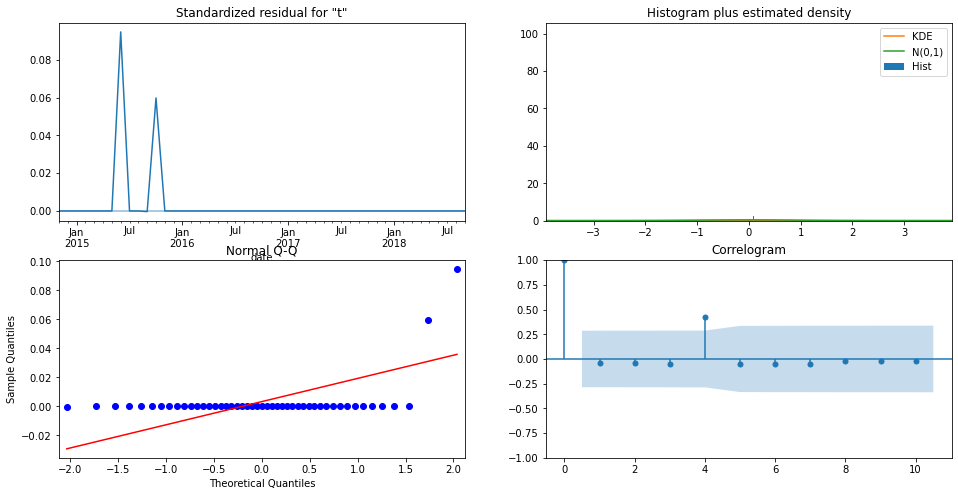

In [111]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(timeSeries,
                                order=(1, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary())
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

### 7.2.3 ARIMA using sklearn ( After filling missing values)

In [112]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

import warnings
warnings.filterwarnings("ignore")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeSeries_filled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1352.050122400783
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1126.9368228239555
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:775.3762750686991
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:606.7250911374994
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:789.516561187905
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:763.197358407344
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:624.511318446825
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:609.1592463597405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1248.5887095282023
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1040.5493383527528
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:758.1622028820457
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:592.9166508481115
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:784.6372938513276
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:748.039613259331
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - A

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3551      0.152      2.329      0.020       0.056       0.654
ma.L1         -1.0000      0.150     -6.654      0.000      -1.295      -0.705
ma.S.L12      -0.5257      0.168     -3.138      0.002      -0.854      -0.197
sigma2      1.758e+04   8.55e-06   2.06e+09      0.000    1.76e+04    1.76e+04


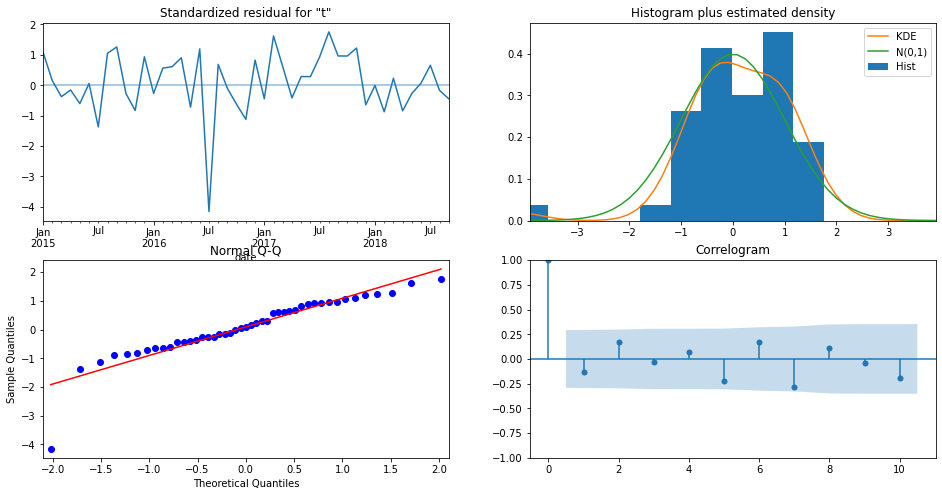

In [113]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(timeSeries_filled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

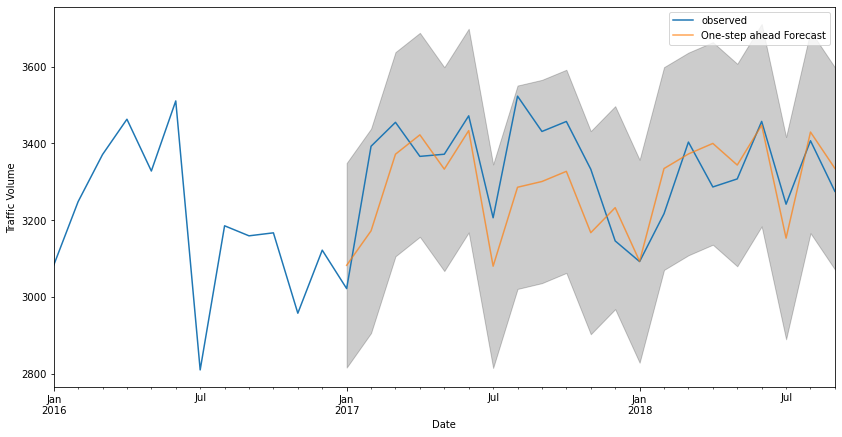

Unsupervised - without missing values 
ARIMA(1, 1, 1)x(0, 1, 1, 12)12
---------------------------------
MAE : 88.27
MSE : 11781.93
RMSE  : 108.544611
R2_SCORE  : 0.314331


In [114]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = timeSeries_filled['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Volume')
plt.legend()
plt.show()

from math import sqrt

predicted = pred.predicted_mean
expected = timeSeries_filled['2017-01-01':]
print("Unsupervised - without missing values ")
print('ARIMA(1, 1, 1)x(0, 1, 1, 12)12')
print("---------------------------------")

MAE = mean_absolute_error(expected, predicted)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(expected, predicted)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(expected, predicted)
print('R2_SCORE  : %f' % R2_SCORE)

# 7.3 Supervised Learning 

### 7.3.1 Holt-Winters Forecast

Supervised Learning- without missing values -- Holt-Winters
-----------------------------------------------------------
Bias  : 26.545037
MAE : 115.67
MSE : 21468.11
RMSE  : 146.520002
R2_SCORE  : -0.249372


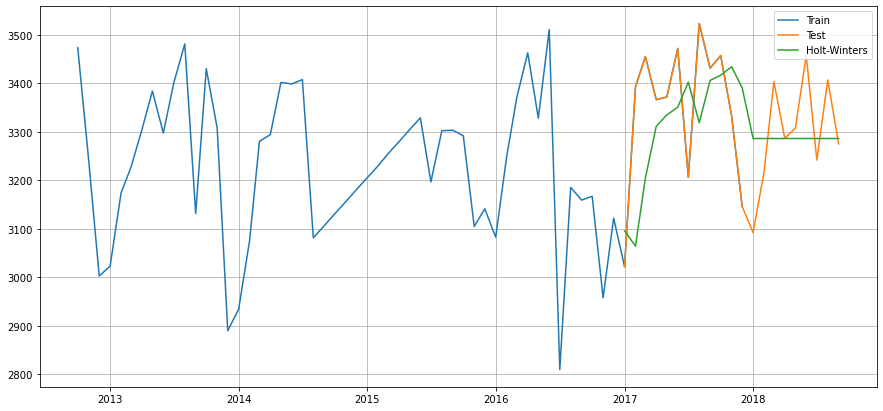

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = timeSeries_filled[:'2017'], timeSeries_filled['2017':]
model = ExponentialSmoothing(train, seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc="upper right")
plt.grid(True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Supervised Learning- without missing values -- Holt-Winters")
print("-----------------------------------------------------------")

forecast_errors = [test[i]-pred[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias  : %f' % bias)

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))


RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)


R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

### 7.3.2 Augmented Dickey Fuller Test - to check Stationarity
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [116]:
traffic_series_st = timeSeries_filled

In [117]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = traffic_series_st
X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.857644
p-value: 0.000000
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


### 7.3.3 KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [118]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss

#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value

    print (kpss_output)
    

kpss_test(traffic_series_st)

Results of KPSS Test:
Test Statistic            0.295293
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Case 1: Both tests conclude that the series is not stationary -> series is not stationary

Case 2: Both tests conclude that the series is stationary -> series is stationary

Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary

Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

In [119]:
# Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary
traffic_series_st.head()

date
2012-10-01    3473.500000
2012-11-01    3241.966667
2012-12-01    3002.838710
2013-01-01    3023.064516
2013-02-01    3173.964286
Freq: MS, Name: traffic_volume, dtype: float64

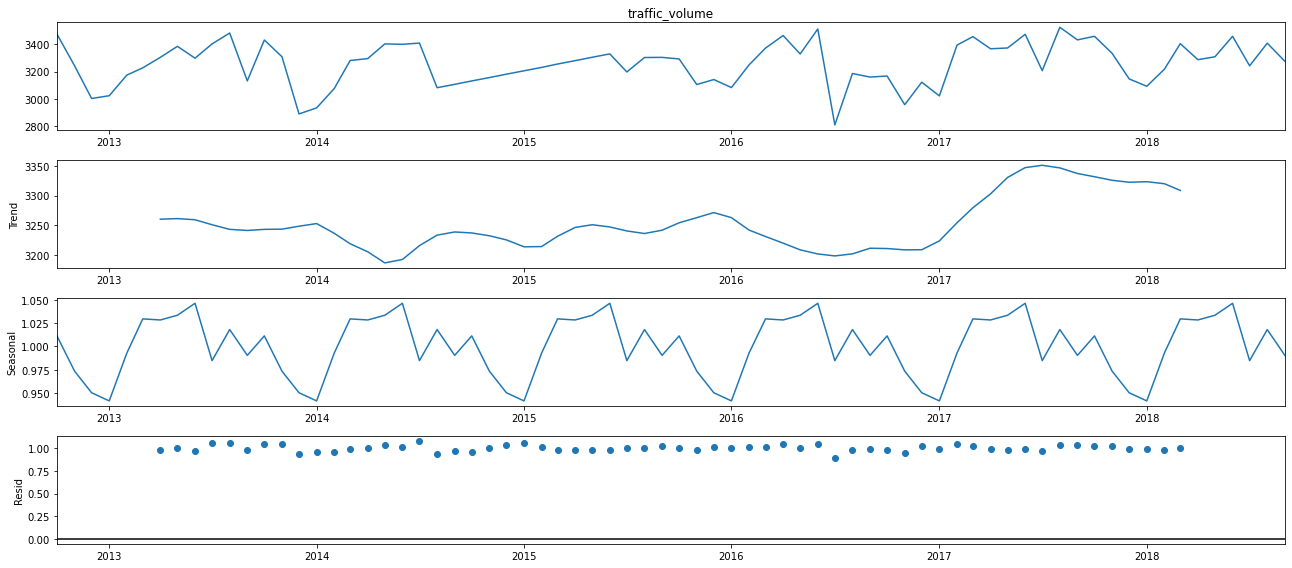

In [120]:
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(traffic_series_st, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [121]:
# time series hasboth trend and seasonality .diff twice

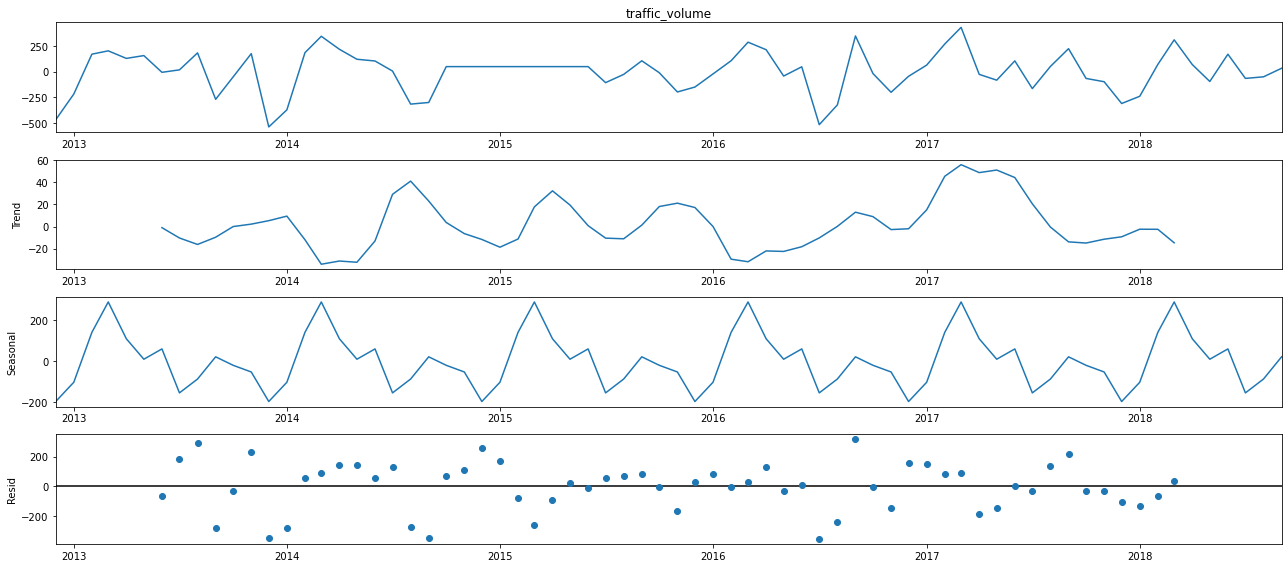

In [122]:
# to eliminate seasonality differenciating twice
traffic_series_st = timeSeries_filled - timeSeries_filled.shift(2)
traffic_series_st=traffic_series_st.dropna()

decomposition = sm.tsa.seasonal_decompose(traffic_series_st, model='additive')
fig = decomposition.plot()
plt.show()

In [123]:
timeSeries_filled = traffic_series_st

### 7.3.4 ARIMA using sklearn ( without missing values)

In [124]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

import warnings
warnings.filterwarnings("ignore")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeSeries_filled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:925.7211537761116
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:757.3413907508991
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:773.3944823370305
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:598.8515669293839
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:768.1544394386586
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:753.8221254061381
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:621.1649774903877
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:597.0468090861423
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:893.9710141942516
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:722.5233426175387
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:746.7313861075388
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:574.5971853353276
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:751.4348270835224
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:723.6847141694009
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3399      0.163      2.087      0.037       0.021       0.659
ar.L2          0.1168      0.163      0.715      0.475      -0.204       0.437
ma.L1         -0.0004      7.726  -4.76e-05      1.000     -15.143      15.142
ma.L2         -0.9996      0.359     -2.781      0.005      -1.704      -0.295
ma.S.L12       0.5521      0.212      2.600      0.009       0.136       0.968
ma.S.L24       0.3782      0.300      1.260      0.208      -0.210       0.966
ma.S.L36      -0.2335      0.367     -0.637      0.524      -0.953       0.486
sigma2      1.408e+04      0.001   2.53e+07      0.000    1.41e+04    1.41e+04


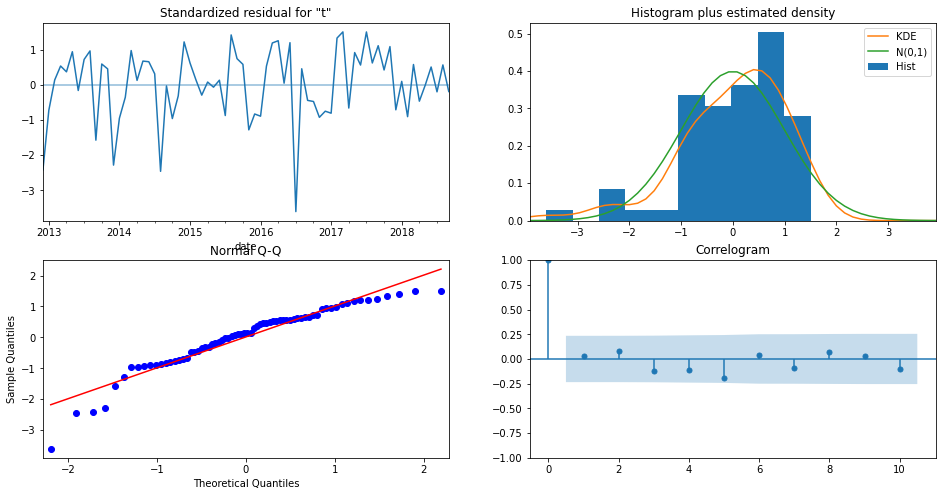

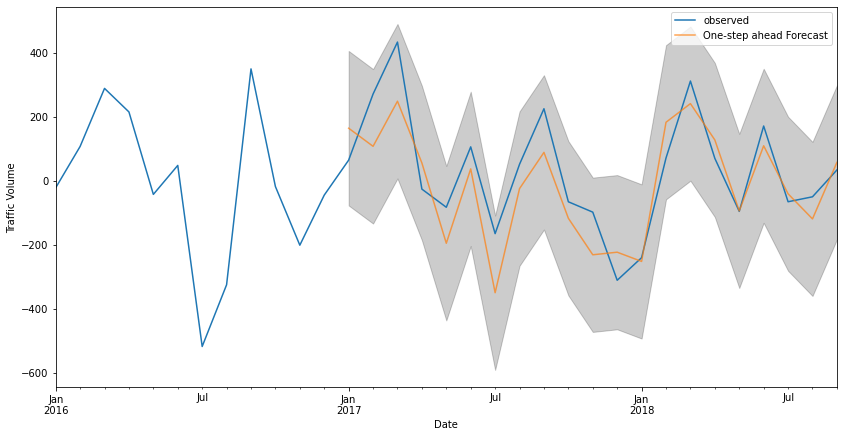

Supervised Learning- without missing values
ARIMA(2, 0, 2)x(0, 0, 3, 12)12 
---------------------------------
MAE : 86.36
MSE : 10107.47
RMSE  : 100.535892
R2_SCORE  : 0.683024


In [125]:
# '2012-10-02 09:00:00'
# '2018-09-30 23:00:00'
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(timeSeries_filled,
                                order=(2, 0, 2),
                                seasonal_order=(0,0,3, 12))
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = timeSeries_filled['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Volume')
plt.legend()
plt.show()

from math import sqrt

predicted = pred.predicted_mean
expected = timeSeries_filled['2017-01-01':]

print("Supervised Learning- without missing values")
print('ARIMA(2, 0, 2)x(0, 0, 3, 12)12 ')
print("---------------------------------")

MAE = mean_absolute_error(expected, predicted)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(expected, predicted)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(expected, predicted)
print('R2_SCORE  : %f' % R2_SCORE)

# 8. Accuracy of different Algorithms: 

## 8.1 Time-Series Analysis (SK Learn)

### Unsupervised  - Holt-Winters
------------------------------------------
MAE : 115.67

MSE : 21468.11

RMSE  : 146.520002

R2_SCORE  : -0.249372

### Unsupervised  - ARIMA(1, 1, 1)x(0, 1, 1, 12)12
-------------------------------------------------------
MAE : 88.27

MSE : 11781.93

RMSE  : 108.544611

R2_SCORE  : 0.314331

### Supervised Learning - Holt-Winters
----------------------------------------------
MAE : 115.67

MSE : 21468.11

RMSE  : 146.520002

R2_SCORE  : -0.249372

### Supervised Learning - ARIMA(2, 0, 2)x(0, 0, 3, 12)12 
-------------------------------------------------------------
MAE : 86.36

MSE : 10107.47

RMSE  : 100.535892

R2_SCORE  : 0.683024

## 8.2 Regression Analysis 

### Multiple Linear Regression
------------------------------
MAE : 0.82

MSE : 0.86

RMSE  : 0.925418

R2_SCORE  : 0.147111


    
### Support Vector Regressor
------------------------------
Accuracy : 0.7899783329541525

MAE : 0.34

MSE : 0.21

RMSE  : 0.459223

R2_SCORE  : 0.789978


    
### K Neighbors Regressor
------------------------------
Accuracy : 0.8481137023085761

MAE : 0.31

MSE : 0.19

RMSE  : 0.432939

R2_SCORE  : 0.813332
    

### Multi Layer Perceptron Model
------------------------------
Accuracy : 0.9379193593299611

MAE : 0.17

MSE : 0.06

RMSE  : 0.249672

R2_SCORE  : 0.937919